In [66]:
import csv
import math
import copy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
data_path = '/content/drive/MyDrive/Datasets/data2.txt'

In [55]:
data = pd.read_csv(data_path, header=None, names = ["x1","x2","y"])
data.tail()

,x1,x2,y
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


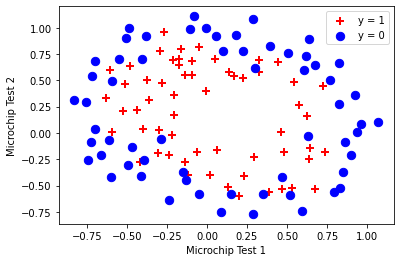

In [56]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data['y'] == 0
    pos = data['y'] == 1

    # print(neg, pos)

    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='red', s=70, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=70, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [57]:
n = data.shape[1]-1
x = data[data.columns[0:n]]

y = data[data.columns[n:n+1]]
# convert to np.array
X = x.values
y = y.values

# print(y)

In [59]:
def mapFeature( x1col, x2col):
    degrees = 10
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [60]:
XX = mapFeature(X[:,0],X[:,1])
print(X.shape, XX.shape)

(118, 2) (118, 66)


In [61]:
from scipy.special import expit #Vectorized sigmoid function

#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))

In [62]:

#Cost function, default lambda (regularization) 0
def computeCost(mytheta,myX,myy,mylambda = 0.): 

    m = myy.size # number of training examples

    term1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    term2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1./m) * ( np.sum(term1 - term2) + regterm ) )

In [113]:
def sigmoid(x):
    x = np.clip( x, -500, 500 )
    result = 1.0/(1.0+np.exp(-x))
    return result

In [120]:
def gradient_logistic(X, y, w):
  row, column = X.shape
  # print(row,n)
  dj_dw = np.zeros((column,))

  for i in range(row):
    prediction = sigmoid(np.dot(X[i], w))                           
    error  = prediction  - y[i]                       
    for j in range(column):
      dj_dw[j] = dj_dw[j] + error * X[i,j]        
  dj_dw = dj_dw/row                                   
      
  return dj_dw

In [121]:
from scipy import optimize
# initial_theta = np.zeros((XX.shape[1],1))
# def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
#     result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
#     return np.array([result.x]), result.fun

initial_theta = np.zeros(XX.shape[1])

def optimizeRegularizedTheta(mytheta, myX, myy, learning_rate, maxiter, mylambda=0.):
  m = myX.shape[0]
  cost_history = []
  w = copy.deepcopy(mytheta)

  for i in range(maxiter):

    dj_dw = gradient_logistic(myX, myy, w)   

    w = w*(1-learning_rate*(mylambda/m)) - learning_rate * dj_dw              
  
    if i<100000: 
        cost_history.append( computeCost(w, myX, myy, mylambda) )

    if i% math.ceil(maxiter / 10) == 0:
        print(f"Iteration {i:4d}: Cost {cost_history[-1]}   ")

  return w, min(cost_history)

theta, mincost = optimizeRegularizedTheta(initial_theta,XX,y, 0.1, 100)
print(theta)
print(mincost)

Iteration    0: Cost 0.691100342525338   
Iteration   10: Cost 0.6745247304834239   
Iteration   20: Cost 0.662429140756798   
Iteration   30: Cost 0.6527223265301214   
Iteration   40: Cost 0.6444403143538936   
Iteration   50: Cost 0.6371093503528475   
Iteration   60: Cost 0.6304730545334474   
Iteration   70: Cost 0.6243774784919752   
Iteration   80: Cost 0.6187210453052703   
Iteration   90: Cost 0.6134315346366914   
[ 0.21980259 -0.03949318  0.17680958 -0.36647819 -0.10509445 -0.18188768
 -0.07526844 -0.04859032 -0.06204244 -0.0630484  -0.29070407 -0.01424949
 -0.09812425 -0.02868105 -0.21291026 -0.10894424 -0.03235489 -0.0221189
 -0.04117423 -0.03887996 -0.13599942 -0.22239972 -0.00401091 -0.05049457
 -0.00193417 -0.05373719 -0.01313744 -0.20704175 -0.11727771 -0.01970546
 -0.01576503 -0.01737718 -0.0100774  -0.03114817 -0.02231062 -0.16341925
 -0.17743324 -0.00273491 -0.0285809  -0.00091388 -0.02164516 -0.00046305
 -0.03550264 -0.00697696 -0.20089995 -0.11597428 -0.01352922 -

In [122]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,0.1,1000,mylambda)
    print(theta, '\n\nCost : ', mincost, '\n \n ')
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
            # print(type(zvals), zvals.shape)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

Iteration    0: Cost 0.691100342525338   
Iteration  100: Cost 0.6084547570625648   
Iteration  200: Cost 0.5695610710258278   
Iteration  300: Cost 0.5416710089367659   
Iteration  400: Cost 0.5198661671992133   
Iteration  500: Cost 0.5021505299816056   
Iteration  600: Cost 0.4873998933845835   
Iteration  700: Cost 0.4748894276765046   
Iteration  800: Cost 0.4641208383686552   
Iteration  900: Cost 0.4547377973709433   
[ 1.26417001e+00  7.35785885e-01  1.34575328e+00 -2.05425981e+00
 -9.41669252e-01 -1.20175477e+00  2.36484563e-01 -4.14345656e-01
 -4.16023101e-01 -1.18983482e-02 -1.50604511e+00 -8.73088139e-02
 -6.65501535e-01 -2.97257007e-01 -1.06321371e+00 -1.61310274e-01
 -2.42833027e-01 -7.79800864e-02 -2.93290541e-01 -3.33313239e-01
 -3.29543875e-01 -1.06496165e+00  5.95148218e-03 -3.24248588e-01
 -5.39771789e-03 -3.48586876e-01 -1.63715987e-01 -8.23557181e-01
 -3.06198193e-01 -1.24851523e-01 -5.83636352e-02 -1.27239389e-01
 -5.16787175e-02 -1.85022617e-01 -2.23006646e-01 -4

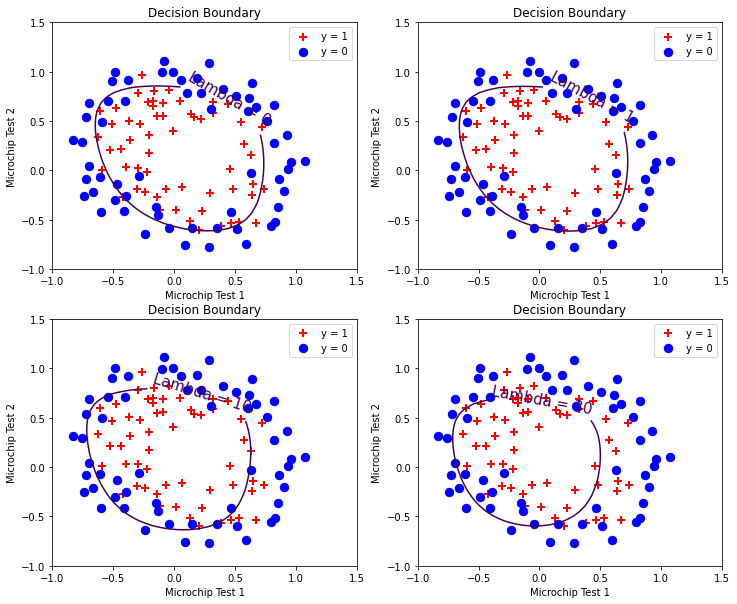

In [123]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta, XX, y, 0.)

plt.subplot(222)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,1.)

plt.subplot(223)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,10.)

plt.subplot(224)
plotData(data, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
plotBoundary(initial_theta,XX,y,30.)